In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Sample text data
text = "hello world"

# Create a character-to-index mapping
chars = sorted(list(set(text)))
char_to_index = {char: idx for idx, char in enumerate(chars)}
index_to_char = {idx: char for idx, char in enumerate(chars)}

# Convert text to sequences of integers
sequences = [char_to_index[char] for char in text]

# Prepare input-output pairs
X = []
y = []
seq_length = 3

for i in range(len(sequences) - seq_length):
    X.append(sequences[i:i + seq_length])
    y.append(sequences[i + seq_length])

X = np.array(X)
y = np.array(y)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Normalize the input
X = X / float(len(chars))

# One-hot encode the output
y = tf.keras.utils.to_categorical(y, num_classes=len(chars))

In [ ]:
# Define the RNN model
model = Sequential([
    SimpleRNN(50, input_shape=(seq_length, 1)),
    Dense(len(chars), activation='softmax')])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model and store the training history
history = model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.0997
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 2.0782
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1250 - loss: 2.0573
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2500 - loss: 2.0370
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2500 - loss: 2.0171
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2500 - loss: 1.9977
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2500 - loss: 1.9788
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2500 - loss: 1.9602
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2500 - loss: 1.9420
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2500 - loss: 1.9241
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2500 - loss: 1.9064
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.250

In [ ]:
# Function to predict the next character
def predict_next_char(model, input_text, char_to_index, index_to_char, seq_length):
    input_seq = [char_to_index[char] for char in input_text]
    input_seq = pad_sequences([input_seq], maxlen=seq_length, truncating='pre')
    input_seq = np.reshape(input_seq, (1, seq_length, 1))
    input_seq = input_seq / float(len(chars))

    predicted_index = np.argmax(model.predict(input_seq, verbose=0))
    return index_to_char[predicted_index]

In [ ]:
# Test the prediction
input_text = "hel"
predicted_char = predict_next_char(model, input_text, char_to_index, index_to_char, seq_length)
print(f"Input: {input_text}, Predicted next character: {predicted_char}")

Input: hel, Predicted next character: o


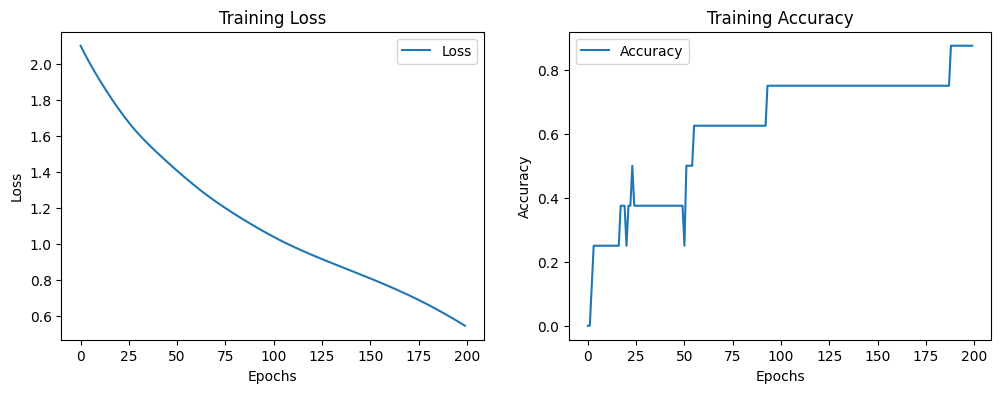

In [ ]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()